**Objective:** In this notebook, we will try to explain and understand Bagging and Boosting two ensemble techniques in machine learning.

- How to combine weak learners to build a stronger learner to reduce bias and variance in your ML model

- Bagging or Bootstrap Aggregation:
- The key idea of bagging is the use of multiple base learners which are trained separately with a random sample from the training set, which through a voting or averaging approach, produce a more stable and accurate model.

- The main two components of bagging technique are: the random sampling with replacement (bootstraping) and the set of homogeneous machine learning algorithms (ensemble learning). The bagging process is quite easy to understand, first it is extracted “n” subsets from the training set, then these subsets are used to train “n” base learners of the same type. For making a prediction, each one of the “n” learners are feed with the test sample, the output of each learner is averaged (in case of regression) or voted (in case of classification

- One of the key advantages of bagging is that it can be executed in parallel since there is no dependency between estimators. For small datasets, a few estimators will be enough (such as the example above), larger dataset may require more estimators.

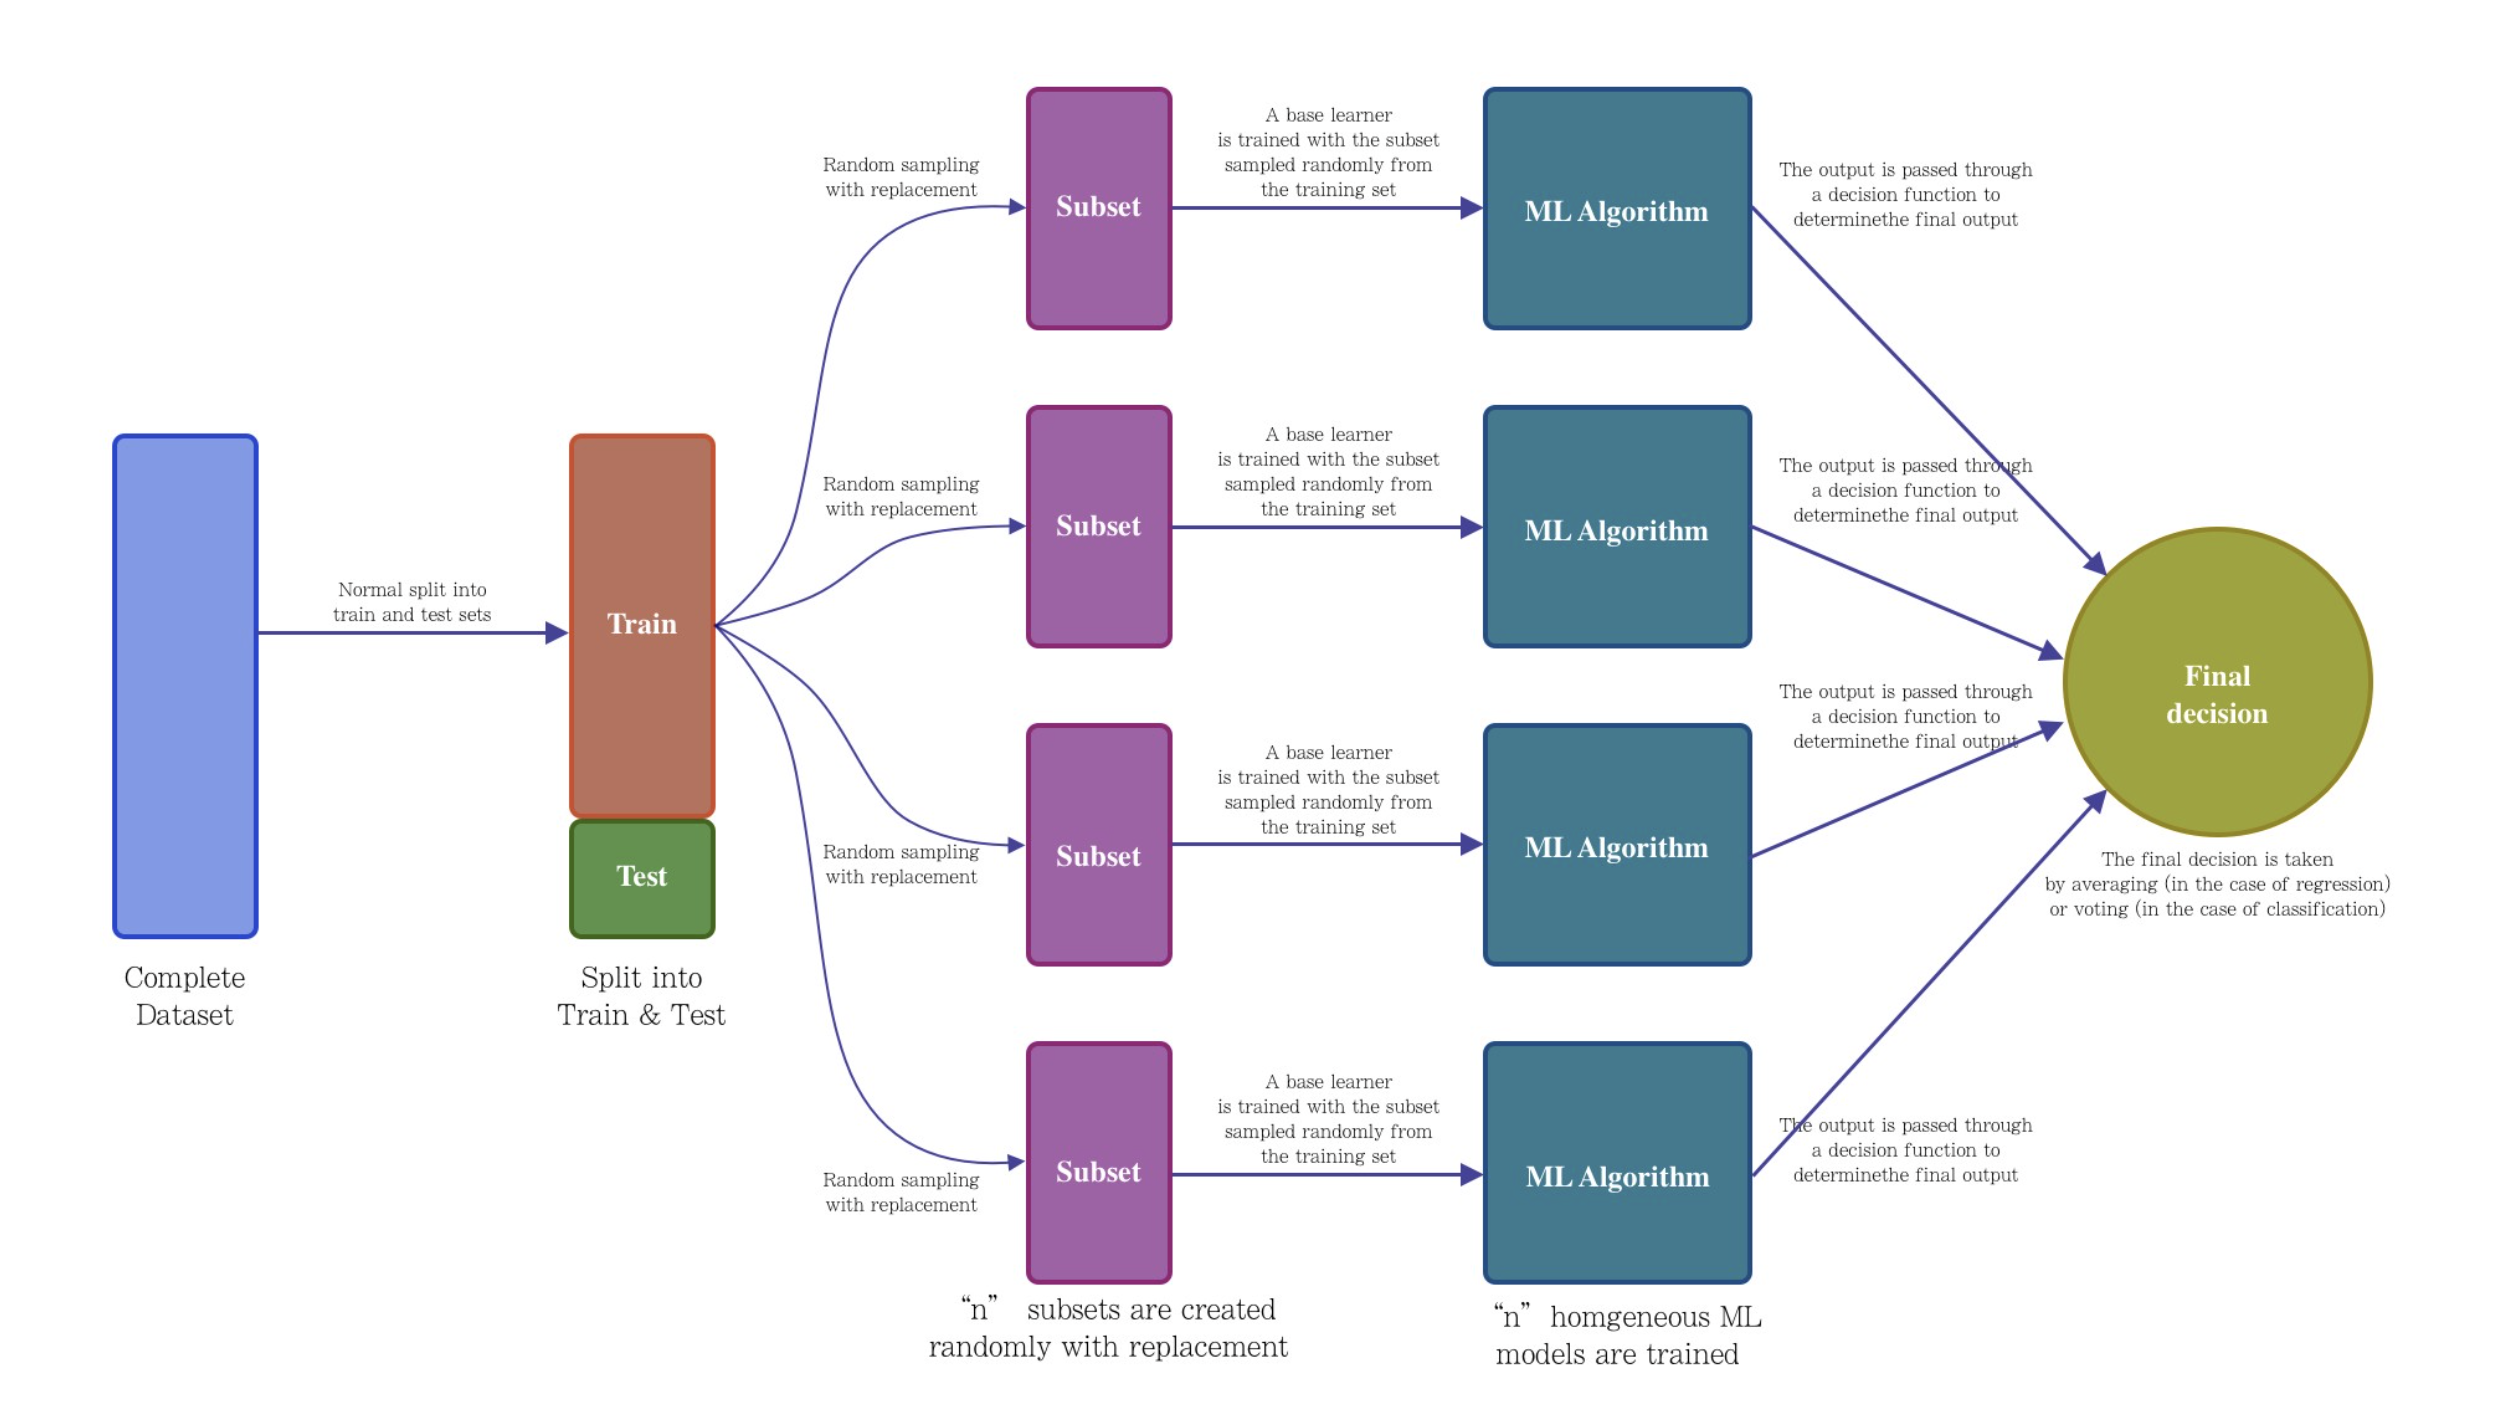

In [1]:

# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# For simplicity, we are going to use as base estimator a Decision Tree with fixed parameters
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:
# base_estimator = DecisionTree
# n_estimators = 5 : it's gonna be created 5 subsets to train 5 Decision Tree models
# max_samples = 50 : it's gonna be taken randomly 50 items with replacement
# bootstrap = True : means that the sampling is gonna be with replacement
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")


Train score: 0.9483568075117371
Test score: 0.951048951048951


# Boosting

- The central idea of boosting is the implementation of homogeneous ML algorithms in a sequential way, where each of these ML algorithms tries to improve the stability of the model by focusing on the errors made by the previous ML algorithm. The way in which the errors of each base learner is considered to be improved with the next base learner in the sequence, is the key differentiator between all variations of the boosting technique.

- The boosting technique has been studied and improved over the years, several variations have been added to the core idea of boosting, some of the most popular are: AdaBoost (Adaptive Boosting), Gradient Boosting and XGBoost (Extreme Gradient Boosting). As mentioned above, the key differentiator between boosting-based techniques is the way in which errors are penalized (by modifying weights or minimizing a loss function) as well as how the data is sampled.

# AdaBoost

In [3]:

# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)

# AdaBoost initialization
# It's defined the decision tree as the base learner
# The number of estimators will be 5
# The penalizer for the weights of each estimator is 0.1
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(x_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(x_train, y_train)}")
print(f"Test score: {adaboost.score(x_test, y_test)}")

Train score: 0.9694835680751174
Test score: 0.958041958041958


# Gradient Boosting

In [4]:

# For this basic implementation, we only need these modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load the well-known Breast Cancer dataset
# Split into train and test sets
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# Gradient Boosting initialization
# The base learner is a decision tree as default
# The number of estimators is 5
# The depth for each deciion tree is 2
# The learning rate for each estimator in the sequence is 1
gradientBoosting = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=2, random_state=23)

# Train!
gradientBoosting.fit(x_train, y_train)

# Evaluation
print(f"Train score: {gradientBoosting.score(x_train, y_train)}")
print(f"Test score: {gradientBoosting.score(x_test, y_test)}")

Train score: 0.9906103286384976
Test score: 0.965034965034965


Gradient Boosting works with decision trees by default, that is why in the implementation we do not define a specific base learner. We are defining that each tree in the sequence will have a maximum depth of 2, the number of trees will be 5 and the learning rate for each tree will be 0.1

# Summarization

As we have seen, bagging is a technique that performs random samples with replacement to train “n” base learners, this allows the model to be processed in parallel. It is because of this random sampling that bagging is a technique that mostly allows to reduce the variance. On the other hand, boosting is a sequentially constructed technique where each model in the sequence tries to focus on the error of the previous base learner. Although boosting is a technique that mainly allows to reduce the variance, it is highly prone to over-fitting the model.